In [1]:
from itertools import product
from typing import List

import pandas as pd
import numpy as np
import os
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load Data

In [2]:
def load(data_dir: str) -> pd.DataFrame:
    sales_df = pd.read_csv(os.path.join(data_dir, "sales_train.csv"))
    items_df = pd.read_csv(os.path.join(data_dir, "items.csv"))
    item_categories = pd.read_csv(os.path.join(data_dir, "item_categories.csv"))
    shops_df = pd.read_csv(os.path.join(data_dir, "shops.csv"))
    
    sales_df = sales_df.merge(items_df, how="left", on="item_id")
    sales_df = sales_df.merge(item_categories, how="left", on="item_category_id")
    sales_df = sales_df.merge(shops_df, how="left", on="shop_id")
    
    return sales_df

In [3]:
df = load(data_dir="../data")

In [4]:
df.head(n=10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""


In [5]:
df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2935844,10.10.2015,33,25,7409,299.0,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.0,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.0,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""
2935848,03.10.2015,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [7]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


# Clean

### Look for NaN Values

In [8]:
df.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

### Casting

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [10]:
df.head(n=1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [11]:
def _cast_values(df: pd.DataFrame) -> pd.DataFrame:
    df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
    df["date_block_num"] = df["date_block_num"].astype("int8")
    df["shop_id"] = df["shop_id"].astype("int16")
    df["item_id"] = df["item_id"].astype("int16")
    df["item_price"] = df["item_price"].astype("float64")
    df["item_cnt_day"] = df["item_cnt_day"].astype("float32")
    df["item_category_id"] = df["item_category_id"].astype("int16")
    
    return df

In [12]:
df = _cast_values(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int8          
 2   shop_id             int16         
 3   item_id             int16         
 4   item_price          float64       
 5   item_cnt_day        float32       
 6   item_name           object        
 7   item_category_id    int16         
 8   item_category_name  object        
 9   shop_name           object        
dtypes: datetime64[ns](1), float32(1), float64(1), int16(3), int8(1), object(3)
memory usage: 165.2+ MB


### Remove Outliers

<AxesSubplot:>

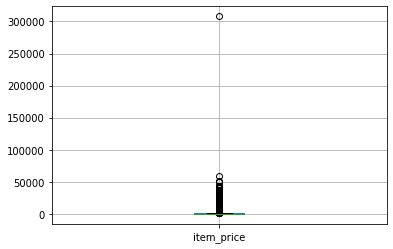

In [14]:
df[["item_price"]].boxplot()

<AxesSubplot:>

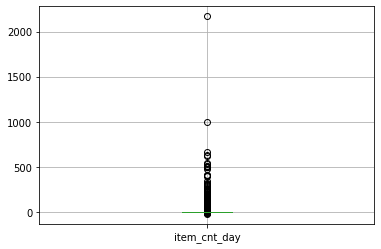

In [15]:
df[["item_cnt_day"]].boxplot()

In [16]:
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    df = df[(df["item_price"] < 25000) & (df["item_price"] > 0)]
    df = df[(df["item_cnt_day"] < 500) & (df["item_cnt_day"] > 0)]
    
    return df

In [17]:
df = remove_outliers(df)

<AxesSubplot:>

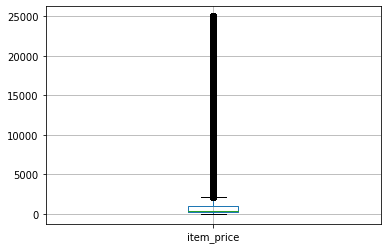

In [18]:
df[["item_price"]].boxplot()

<AxesSubplot:>

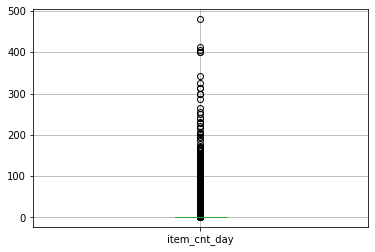

In [19]:
df[["item_cnt_day"]].boxplot()

# Aggregate Data at the Month Level

In [20]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
5,2013-01-10,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""


In [21]:
month_df = df.groupby(by=["date_block_num", "shop_id", "item_id"], as_index=False).agg(
    item_price=("item_price", "mean"),
    item_cnt_month=("item_cnt_day", "sum"),
    item_name=("item_name", "first"),
    item_category_id=("item_category_id", "first"),
    item_category_name=("item_category_name", "first"),
    shop_name=("shop_name", "first")
)

In [22]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_name,item_category_id,item_category_name,shop_name
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран"


# Fill Discontinuity in the Data

In [23]:
def fill_discontinuity_in_the_data(data: pd.DataFrame) -> pd.DataFrame:
    # Get references to different ids & string features.
    unique_item_features = data[
        ["item_id", "item_name", "item_category_id", "item_category_name"]
    ].drop_duplicates()
    unique_shop_features = data[["shop_id", "shop_name"]].drop_duplicates()

    # Keep a reference of the initial dtypes to cast them back after filling the missing values.
    dtypes = data.dtypes.to_dict()

    # Fill data discontinuity.
    filled_data = []
    for block_num in data["date_block_num"].unique():
        block_num_shop_ids = data.loc[data["date_block_num"] == block_num, "shop_id"].unique()
        block_num_item_ids = data.loc[data["date_block_num"] == block_num, "item_id"].unique()

        possible_combinations = list(product(*[[block_num], block_num_shop_ids, block_num_item_ids]))
        filled_data.append(np.array(possible_combinations, dtype="int32"))

    filled_data = np.vstack(filled_data)
    filled_data = pd.DataFrame(filled_data, columns=["date_block_num", "shop_id", "item_id"])
    data = filled_data.merge(data, on=["date_block_num", "shop_id", "item_id"], how="left")

    # Merge unique features to fill missing ids & string values.
    data = data.drop(columns=["item_name", "item_category_id", "item_category_name"])
    data = data.merge(unique_item_features, on=["item_id"], how="left")
    data = data.drop(columns=["shop_name"])
    data = data.merge(unique_shop_features, on=["shop_id"], how="left")

    # Fill missing numerical values (e.g. price, sales, revenue).
    numeric_columns = data.select_dtypes(include=['number']).columns
    numeric_columns = set(numeric_columns)
    numeric_columns = numeric_columns - {"date_block_num", "shop_id", "item_id", "item_category_id"}
    numeric_columns = list(numeric_columns)
    data[numeric_columns] = data[numeric_columns].fillna(0)

    data = data.astype(dtypes)
    
    return data

In [24]:
print(f"Length of data before filling: {len(month_df)}")
month_df = fill_discontinuity_in_the_data(month_df)
print(f"Length of data after filling: {len(month_df)}")

Length of data before filling: 1607330
Length of data after filling: 10880126


In [25]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_name,item_category_id,item_category_name,shop_name
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран"


date_block_num: 0, 1, 5, 8, 9 ---> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

# Visualize

### Shop

In [26]:
shop_df = month_df.query("shop_id == 5")

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_month'>

/home/iusztin/anaconda3/envs/aclabs/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


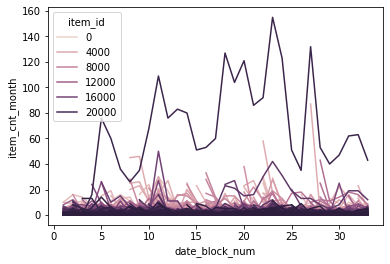

In [27]:
sns.lineplot(data=shop_df, x="date_block_num", y='item_cnt_month', hue='item_id')

In [28]:
shop_item_df = month_df.query("shop_id == 5 and item_id == 1000")

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_month'>

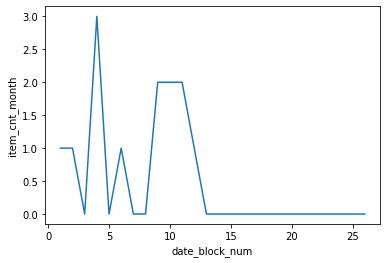

In [29]:
sns.lineplot(data=shop_item_df, x="date_block_num", y="item_cnt_month")

# Autocorrelation / Month Level

### ACF

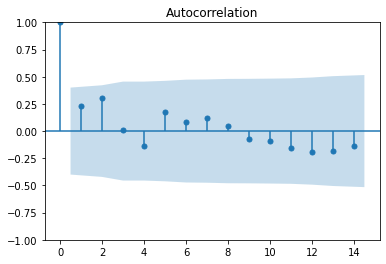

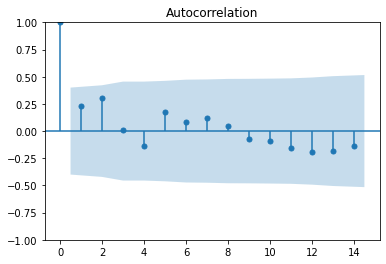

In [30]:
plot_acf(shop_item_df["item_cnt_month"])

### PACF

/home/iusztin/anaconda3/envs/aclabs/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


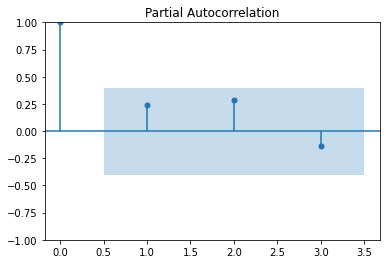

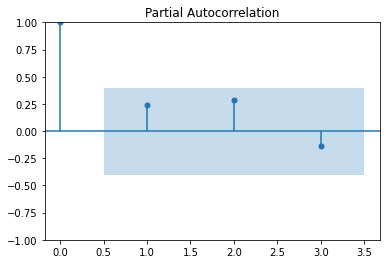

In [31]:
plot_pacf(shop_item_df["item_cnt_month"], lags=3)

# Autocorrelation / Day Level

In [32]:
shop_item_df = df.query("shop_id == 5 and item_id == 1000")

In [33]:
shop_item_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
164335,2013-02-23,1,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",67,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""
345342,2013-03-09,2,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",67,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""
529737,2013-05-26,4,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",67,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""
529738,2013-05-02,4,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",67,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""
529746,2013-05-20,4,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",67,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""


In [34]:
shop_item_df = shop_item_df.set_index(keys=["date"], drop=True)
shop_item_df = shop_item_df[["item_cnt_day"]]
shop_item_df.head()

,item_cnt_day
date,
2013-02-23,1.0
2013-03-09,1.0
2013-05-26,1.0
2013-05-02,1.0
2013-05-20,1.0


In [35]:
shop_item_df.resample("D").mean().fillna(0)

,item_cnt_day
date,
2013-02-23,1.0
2013-02-24,0.0
2013-02-25,0.0
2013-02-26,0.0
2013-02-27,0.0
...,...
2014-01-08,0.0
2014-01-09,0.0
2014-01-10,0.0


In [36]:
shop_item_df = shop_item_df.resample("D").mean().fillna(0)

In [37]:
shop_item_df.index

DatetimeIndex(['2013-02-23', '2013-02-24', '2013-02-25', '2013-02-26',
               '2013-02-27', '2013-02-28', '2013-03-01', '2013-03-02',
               '2013-03-03', '2013-03-04',
               ...
               '2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
               '2014-01-11', '2014-01-12'],
              dtype='datetime64[ns]', name='date', length=324, freq='D')

### ACF

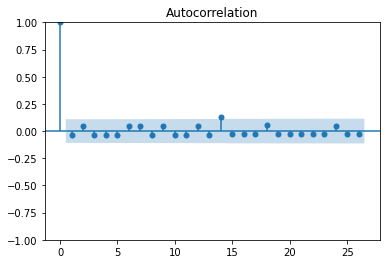

In [38]:
plot_acf(shop_item_df["item_cnt_day"]);

### PACF

/home/iusztin/anaconda3/envs/aclabs/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


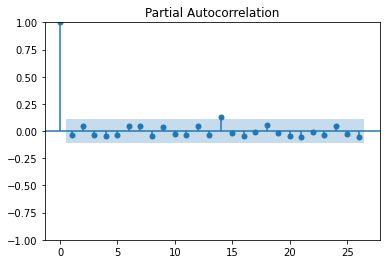

In [39]:
plot_pacf(shop_item_df["item_cnt_day"]);

# Feature Engineering

### Is New Item (in the entire company)

In [40]:
def add_is_new_item_feature(data: pd.DataFrame) -> pd.DataFrame:
    is_new_item_df = data.groupby(["item_id"], as_index=False)["date_block_num"].min()
    is_new_item_df["is_new_item"] = 1

    data = data.merge(
        is_new_item_df[["date_block_num", "item_id", "is_new_item"]],
        on=["date_block_num", "item_id"],
        how="left"
    )
    data["is_new_item"] = data["is_new_item"].fillna(0)
    data["is_new_item"] = data["is_new_item"].astype(np.int8)

    return data

In [41]:
month_df = add_is_new_item_feature(month_df)

### Is New Item (for every specific shop)

In [42]:
def add_is_first_shop_transaction_feature(data: pd.DataFrame) -> pd.DataFrame:
    is_first_shop_transaction_df = data.groupby(["shop_id", "item_id"], as_index=False)["date_block_num"].min()
    is_first_shop_transaction_df["is_first_shop_transaction"] = 1

    data = data.merge(
        is_first_shop_transaction_df[["date_block_num", "shop_id", "item_id", "is_first_shop_transaction"]],
        on=["date_block_num", "shop_id", "item_id"],
        how="left"
    )
    data["is_first_shop_transaction"] = data["is_first_shop_transaction"].fillna(0)
    data["is_first_shop_transaction"] = data["is_first_shop_transaction"].astype(np.int8)

    return data

In [43]:
month_df = add_is_first_shop_transaction_feature(month_df)

In [44]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_name,item_category_id,item_category_name,shop_name,is_new_item,is_first_shop_transaction
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран",1,1
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран",1,1


### Average Category Sales (at the company level & shop level)

In [45]:
def add_category_sales_feature(data: pd.DataFrame, levels: List[str] = ("company", "shop")) -> pd.DataFrame:
    for level in levels:
        assert level in ("company", "shop")

        if level == "company":
            level_category_df = data.groupby(["date_block_num", "item_category_id"], as_index=False).agg(
                category_company_average_item_sales=("item_cnt_month", "mean"),
                category_company_average_item_price=("item_price", "mean")
            )
            data = data.merge(level_category_df, on=["date_block_num", "item_category_id"], how="left")
            data["category_company_average_item_sales"] = \
                data["category_company_average_item_sales"].fillna(0).astype("int16")
            data["category_company_average_item_price"] = \
                data["category_company_average_item_price"].fillna(0).astype("float32")
        else:
            level_category_df = data.groupby(["date_block_num", "shop_id", "item_category_id"], as_index=False).agg(
                category_shop_average_item_sales=("item_cnt_month", "mean"),
                category_shop_average_item_price=("item_price", "mean")
            )
            data = data.merge(level_category_df, on=["date_block_num", "shop_id", "item_category_id"], how="left")
            data["category_shop_average_item_sales"] = \
                data["category_shop_average_item_sales"].fillna(0).astype("int16")
            data["category_shop_average_item_price"] = \
                data["category_shop_average_item_price"].fillna(0).astype("float32")

    return data

In [46]:
month_df = add_category_sales_feature(month_df)

In [47]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_name,item_category_id,item_category_name,shop_name,is_new_item,is_first_shop_transaction,category_company_average_item_sales,category_company_average_item_price,category_shop_average_item_sales,category_shop_average_item_price
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,0,35.628757,0,46.490185
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран",1,1,0,62.977375,0,91.822273
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,0,35.628757,0,46.490185
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,0,35.628757,0,46.490185
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран",1,1,0,28.006554,0,29.608778


### Item Sales Percentage Change

In [48]:
def add_item_sales_pct_change(data: pd.DataFrame) -> pd.DataFrame:
    item_sales_df = data[["date_block_num", 'item_id', 'shop_id', "item_cnt_month"]].copy() + 1e-27
    item_sales_group = item_sales_df.sort_values(by="date_block_num").groupby(by=['item_id', 'shop_id'], as_index=False)["item_cnt_month"]
    data["item_cnt_month_pct_change"] = item_sales_group.pct_change()
    data["item_cnt_month_pct_change"] = data["item_cnt_month_pct_change"].fillna(0)
    data["item_cnt_month_pct_change"] = data["item_cnt_month_pct_change"].astype("float32")
    
    return data

In [49]:
month_df = add_item_sales_pct_change(month_df)

In [50]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_name,item_category_id,item_category_name,shop_name,is_new_item,is_first_shop_transaction,category_company_average_item_sales,category_company_average_item_price,category_shop_average_item_sales,category_shop_average_item_price,item_cnt_month_pct_change
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,0,35.628757,0,46.490185,0.0
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран",1,1,0,62.977375,0,91.822273,0.0
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,0,35.628757,0,46.490185,0.0
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,0,35.628757,0,46.490185,0.0
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран",1,1,0,28.006554,0,29.608778,0.0


### Time Features (holidays, business days, month)

## Lagged Features

In [51]:
def add_lagged_values(df: pd.DataFrame, column: str, lagged_values: List[int]) -> pd.DataFrame:
    dtype = df[column].dtype
    
    for lag_value in lagged_values:
        df_copy = df[["date_block_num", "shop_id", "item_id", column]].copy()
        df_copy[["date_block_num"]] += lag_value
        df_copy.columns = ["date_block_num", "shop_id", "item_id", f"lag_{column}_{lag_value}"]
        
        df = df.merge(df_copy, on=["date_block_num", "shop_id", "item_id"], how="left")
        df[f"lag_{column}_{lag_value}"] = df[f"lag_{column}_{lag_value}"].fillna(0)
        df[f"lag_{column}_{lag_value}"] = df[f"lag_{column}_{lag_value}"].astype(dtype)
        
    return df

In [52]:
month_df = add_lagged_values(month_df, column="item_cnt_month", lagged_values=[1, 2, 3])

In [53]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_name,item_category_id,item_category_name,shop_name,is_new_item,is_first_shop_transaction,category_company_average_item_sales,category_company_average_item_price,category_shop_average_item_sales,category_shop_average_item_price,item_cnt_month_pct_change,lag_item_cnt_month_1,lag_item_cnt_month_2,lag_item_cnt_month_3
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,0,35.628757,0,46.490185,0.0,0.0,0.0,0.0
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран",1,1,0,62.977375,0,91.822273,0.0,0.0,0.0,0.0
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,0,35.628757,0,46.490185,0.0,0.0,0.0,0.0
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,0,35.628757,0,46.490185,0.0,0.0,0.0,0.0
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран",1,1,0,28.006554,0,29.608778,0.0,0.0,0.0,0.0


In [54]:
month_df.query("shop_id == 5 and item_id == 1000")[["date_block_num", "item_cnt_month", "lag_item_cnt_month_1", "lag_item_cnt_month_2", "lag_item_cnt_month_3"]]

,date_block_num,item_cnt_month,lag_item_cnt_month_1,lag_item_cnt_month_2,lag_item_cnt_month_3
405790,1,1.0,0.0,0.0,0.0
766878,2,1.0,1.0,0.0,0.0
1147916,3,0.0,1.0,1.0,0.0
1514555,4,3.0,0.0,1.0,1.0
1891910,5,0.0,3.0,0.0,1.0
2279842,6,1.0,0.0,3.0,0.0
2664776,7,0.0,1.0,0.0,3.0
3025941,8,0.0,0.0,1.0,0.0
3380366,9,2.0,0.0,0.0,1.0
3750165,10,2.0,2.0,0.0,0.0


In [55]:
month_df = add_lagged_values(month_df, column="category_company_average_item_sales", lagged_values=[1])
month_df = add_lagged_values(month_df, column="category_shop_average_item_sales", lagged_values=[1])

In [56]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_name,item_category_id,item_category_name,shop_name,is_new_item,...,category_company_average_item_sales,category_company_average_item_price,category_shop_average_item_sales,category_shop_average_item_price,item_cnt_month_pct_change,lag_item_cnt_month_1,lag_item_cnt_month_2,lag_item_cnt_month_3,lag_category_company_average_item_sales_1,lag_category_shop_average_item_sales_1
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,...,0,35.628757,0,46.490185,0.0,0.0,0.0,0.0,0,0
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран",1,...,0,62.977375,0,91.822273,0.0,0.0,0.0,0.0,0,0
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,...,0,35.628757,0,46.490185,0.0,0.0,0.0,0.0,0,0
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,...,0,35.628757,0,46.490185,0.0,0.0,0.0,0.0,0,0
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран",1,...,0,28.006554,0,29.608778,0.0,0.0,0.0,0.0,0,0


In [57]:
month_df = month_df.drop(columns=["category_company_average_item_sales", "category_shop_average_item_sales"])

In [58]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_name,item_category_id,item_category_name,shop_name,is_new_item,is_first_shop_transaction,category_company_average_item_price,category_shop_average_item_price,item_cnt_month_pct_change,lag_item_cnt_month_1,lag_item_cnt_month_2,lag_item_cnt_month_3,lag_category_company_average_item_sales_1,lag_category_shop_average_item_sales_1
0,0,0,32,221.0,6.0,1+1,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,35.628757,46.490185,0.0,0.0,0.0,0.0,0,0
1,0,0,33,347.0,3.0,1+1 (BD),37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран",1,1,62.977375,91.822273,0.0,0.0,0.0,0.0,0,0
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,35.628757,46.490185,0.0,0.0,0.0,0.0,0,0
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран",1,1,35.628757,46.490185,0.0,0.0,0.0,0.0,0,0
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,57,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран",1,1,28.006554,29.608778,0.0,0.0,0.0,0.0,0,0


We want to predit `item sales` from time T.
Predict with `item sales` values from T-1, T-2, T-3, etc. and different features from time T.

# Drop Useless Features

In [59]:
month_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_month',
       'item_name', 'item_category_id', 'item_category_name', 'shop_name',
       'is_new_item', 'is_first_shop_transaction',
       'category_company_average_item_price',
       'category_shop_average_item_price', 'item_cnt_month_pct_change',
       'lag_item_cnt_month_1', 'lag_item_cnt_month_2', 'lag_item_cnt_month_3',
       'lag_category_company_average_item_sales_1',
       'lag_category_shop_average_item_sales_1'],
      dtype='object')

In [60]:
month_df = month_df.drop(columns=["item_name", "shop_name", "item_category_name"])

# Correlation Matrix

<AxesSubplot:>

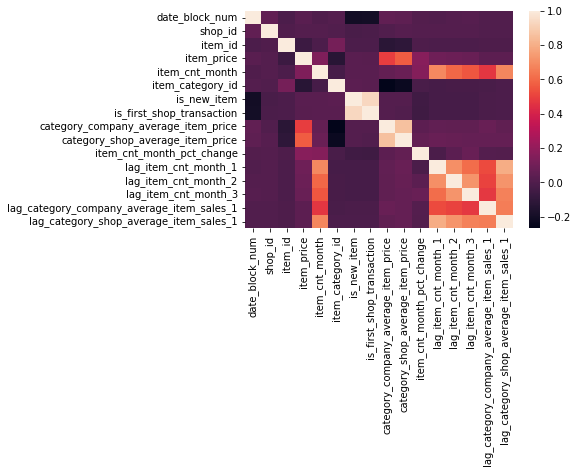

In [61]:
sns.heatmap(month_df.corr())

# Categorical Variables

In [62]:
def encode(data: pd.DataFrame, columns = ("is_new_item", "is_first_shop_transaction")):
    data = pd.get_dummies(data, columns=list(columns), sparse=True)
    
    return data

In [63]:
month_df = encode(month_df)

In [64]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_category_id,category_company_average_item_price,category_shop_average_item_price,item_cnt_month_pct_change,lag_item_cnt_month_1,lag_item_cnt_month_2,lag_item_cnt_month_3,lag_category_company_average_item_sales_1,lag_category_shop_average_item_sales_1,is_new_item_0,is_new_item_1,is_first_shop_transaction_0,is_first_shop_transaction_1
0,0,0,32,221.0,6.0,40,35.628757,46.490185,0.0,0.0,0.0,0.0,0,0,0,1,0,1
1,0,0,33,347.0,3.0,37,62.977375,91.822273,0.0,0.0,0.0,0.0,0,0,0,1,0,1
2,0,0,35,247.0,1.0,40,35.628757,46.490185,0.0,0.0,0.0,0.0,0,0,0,1,0,1
3,0,0,43,221.0,1.0,40,35.628757,46.490185,0.0,0.0,0.0,0.0,0,0,0,1,0,1
4,0,0,51,128.5,2.0,57,28.006554,29.608778,0.0,0.0,0.0,0.0,0,0,0,1,0,1


X: 1, 2, 3
1: 1 0 0
2: 0 1 0
3: 0 0 1

# Split the Data

In [65]:
def split_data(df: pd.DataFrame, validation_month: int = 32, test_month: int = 33):
    train_data = df[df["date_block_num"] < min(validation_month, test_month)]
    validation_data = df[df["date_block_num"] == validation_month]
    test_data = df[df["date_block_num"] == test_month]
    
    train_data = train_data.drop(columns=["date_block_num"])
    validation_data = validation_data.drop(columns=["date_block_num"])
    test_data = test_data.drop(columns=["date_block_num"])
    
    return train_data, validation_data, test_data

def pick_labels(df: pd.DataFrame, labels: List[str]):
    y = df[labels]
    x = df.drop(columns=labels)
    
    return x, y

In [66]:
train_data, validation_data, test_data = split_data(month_df)

In [67]:
x_train, y_train = pick_labels(train_data, labels=["item_cnt_month"])
x_validation, y_validation = pick_labels(validation_data, labels=["item_cnt_month"])
x_test, y_test = pick_labels(test_data, labels=["item_cnt_month"])

# Scale the Data

In [68]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = set(x_train.columns) - {"shop_id", "item_id", "item_category_id"}
columns_to_scale = list(columns_to_scale)
scaler = MinMaxScaler()
scaler.fit(x_train[columns_to_scale])

x_train[columns_to_scale] = scaler.transform(x_train[columns_to_scale])
x_validation[columns_to_scale] = scaler.transform(x_validation[columns_to_scale])
x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

/home/iusztin/anaconda3/envs/aclabs/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/iusztin/anaconda3/envs/aclabs/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/iusztin/anaconda3/envs/aclabs/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/iusztin/anaconda3/envs/aclabs/lib/python3.8/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [69]:
x_train.head()

,shop_id,item_id,item_price,item_category_id,category_company_average_item_price,category_shop_average_item_price,item_cnt_month_pct_change,lag_item_cnt_month_1,lag_item_cnt_month_2,lag_item_cnt_month_3,lag_category_company_average_item_sales_1,lag_category_shop_average_item_sales_1,is_new_item_0,is_new_item_1,is_first_shop_transaction_0,is_first_shop_transaction_1
0,0,32,0.008840,40,0.001609,0.001860,2.079002e-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,33,0.013881,37,0.002854,0.003674,2.079002e-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0,35,0.009880,40,0.001609,0.001860,2.079002e-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,43,0.008840,40,0.001609,0.001860,2.079002e-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0,51,0.005140,57,0.001262,0.001185,2.079002e-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Baseline Model

In [70]:
def predict(x_test: pd.DataFrame):
    return x_test["lag_item_cnt_month_1"]

In [71]:
predict(x_validation)

10429164    0.000000
10429165    0.000000
10429166    0.001533
10429167    0.000000
10429168    0.000000
              ...   
10642477    0.000000
10642478    0.000000
10642479    0.000000
10642480    0.000000
10642481    0.000000
Name: lag_item_cnt_month_1, Length: 213318, dtype: float64

In [72]:
predict(x_test)

10642482    0.000000
10642483    0.000766
10642484    0.000000
10642485    0.000000
10642486    0.000000
              ...   
10880121    0.000000
10880122    0.000000
10880123    0.000000
10880124    0.000000
10880125    0.000000
Name: lag_item_cnt_month_1, Length: 237644, dtype: float64

# Metrics